In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn  as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [9]:
df.duplicated().any()

False

In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [14]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [13]:
df['date_added'] = pd.to_datetime(df['date_added'])

<Axes: xlabel='type'>

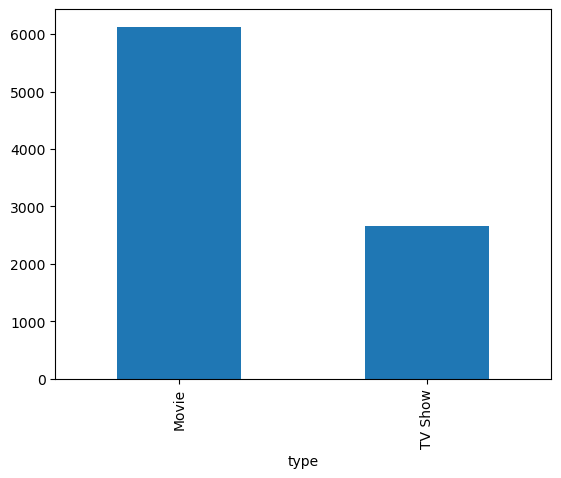

In [24]:
df_type=df["type"].value_counts()
df_type.plot(kind='bar')

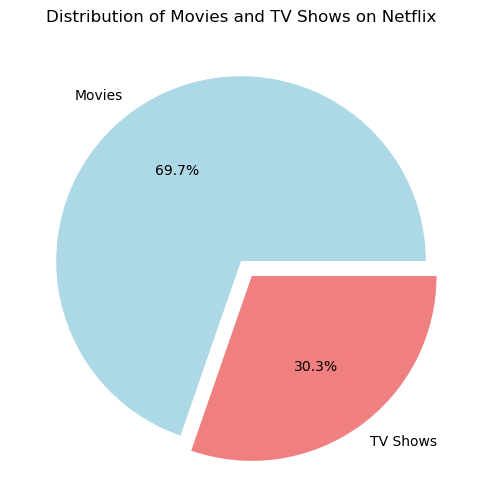

In [16]:
# Count the number of movies and TV shows
showtype = df['type'].value_counts().reset_index()
showtype.columns = ['Type', 'Count']

# Plot the distribution of Movies vs TV Shows
plt.figure(figsize=(8,6))
plt.pie(showtype['Count'], labels=['Movies', 'TV Shows'], autopct='%1.1f%%', explode=[0, 0.1], colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.show()

# Insight: Netflix has 69.7% movies and 30.3% TV shows.


In [17]:
# Director information
directors = df['director'].value_counts()
not_given_dir = directors.get('Not Given', 0)
all_dir = directors.sum()
given_dir = all_dir - not_given_dir

# Plot given vs not given directors
fig = go.Figure(data=[go.Pie(labels=['Given Directors', 'Not Given Directors'], values=[given_dir, not_given_dir])])
fig.update_layout(title='Given Directors vs Not Given Directors')
fig.show()

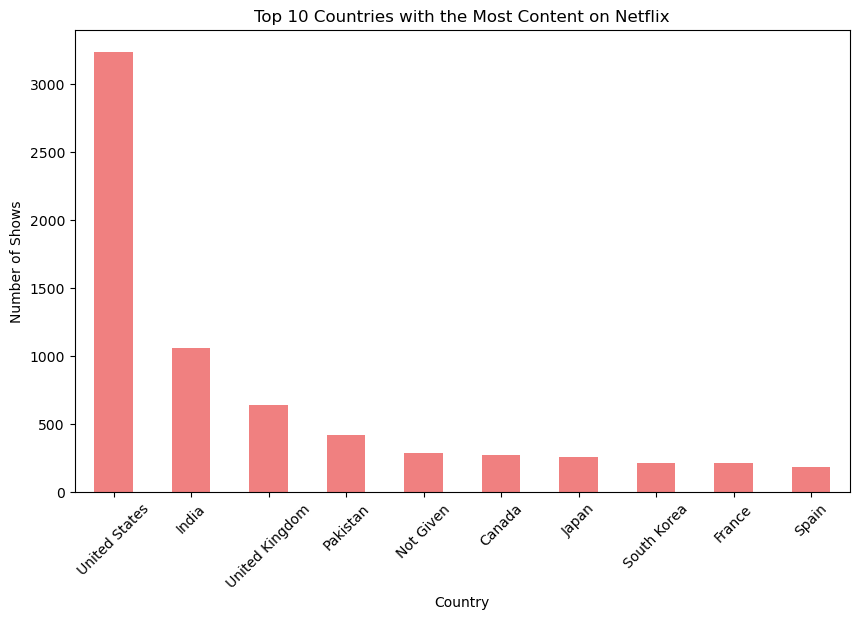

In [18]:
# Top 10 countries with Netflix content
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Countries with the Most Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.show()

# Insight: The United States has the highest number of titles on Netflix, followed by India and the UK.

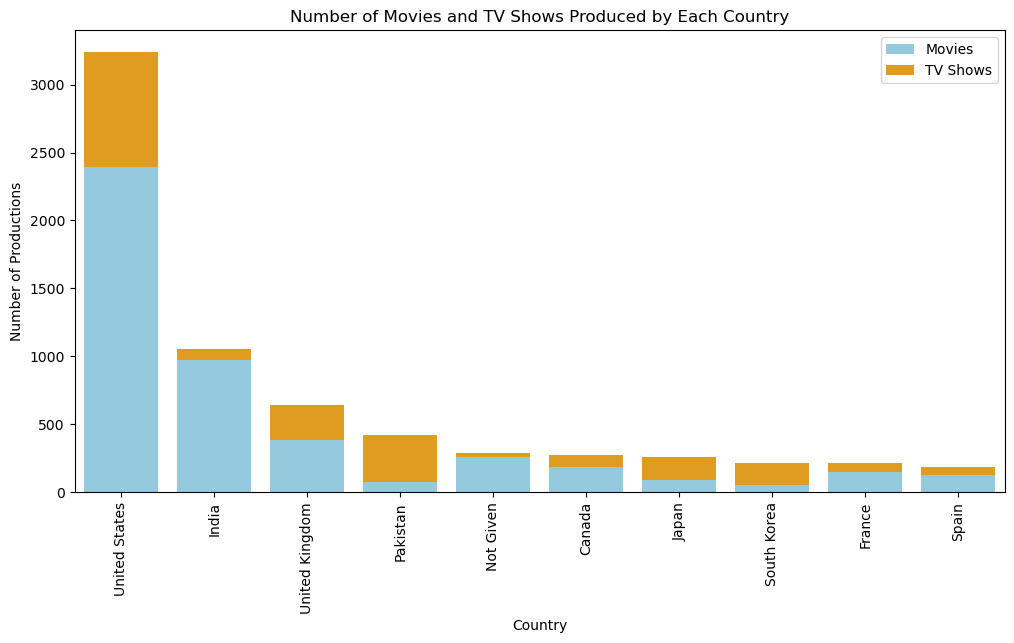

In [25]:
country_type_counts = df.groupby(['country', 'type']).size().unstack(fill_value=0)


country_total_counts = country_type_counts.sum(axis=1)


top_10_countries = country_total_counts.nlargest(10)


plt.figure(figsize=(12, 6)) 


sns.barplot(data=country_type_counts.loc[top_10_countries.index], x=top_10_countries.index, y='Movie', color='skyblue', label='Movies')


sns.barplot(data=country_type_counts.loc[top_10_countries.index], x=top_10_countries.index, y='TV Show', color='orange', label='TV Shows', bottom=country_type_counts.loc[top_10_countries.index, 'Movie'])


plt.xticks(rotation='vertical')
plt.xlabel('Country')
plt.ylabel('Number of Productions')
plt.title('Number of Movies and TV Shows Produced by Each Country')
plt.legend()


plt.show()


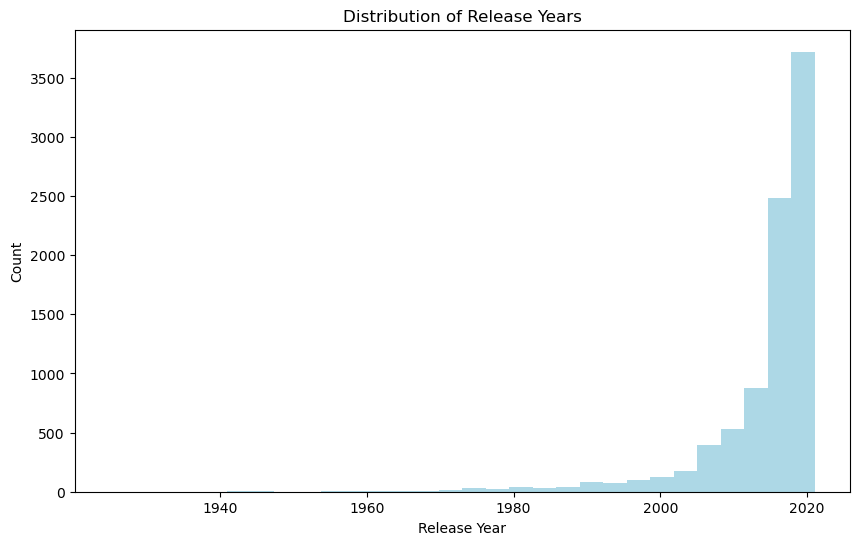

In [19]:
# Release year distribution
plt.figure(figsize=(10,6))
df['release_year'].plot(kind='hist', bins=30, color='lightblue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# Insight: Most titles were released between 2010 and 2020.

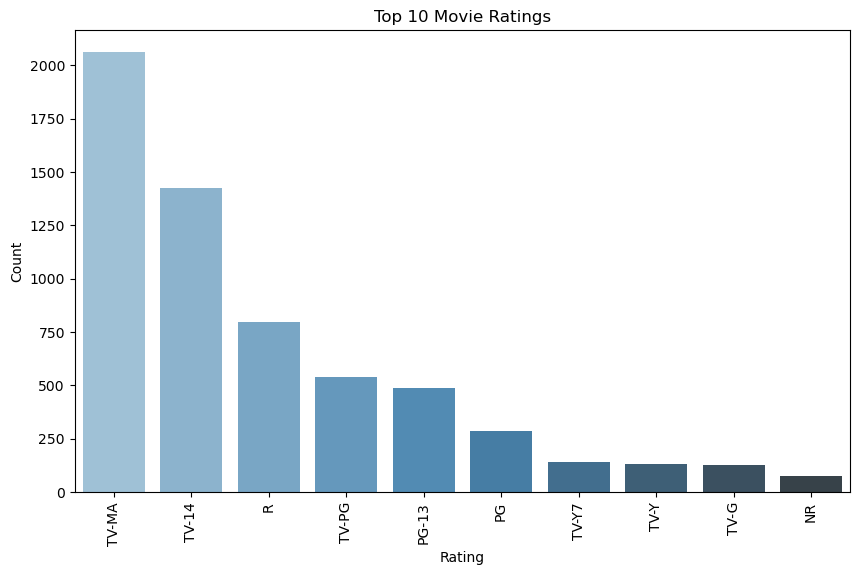

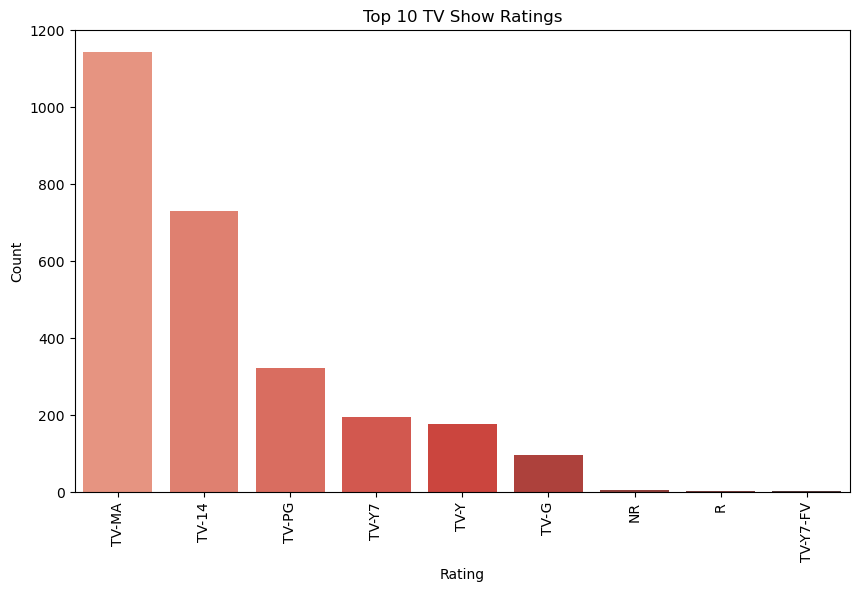

In [20]:
# Group by rating and type
ratings = df.groupby(['rating', 'type'])['type'].value_counts().reset_index(name='count')

# Top 10 movie ratings
top_10_movie_ratings = ratings[ratings['type'] == 'Movie'].sort_values(by='count', ascending=False).head(10)

# Plot top 10 movie ratings
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='count', data=top_10_movie_ratings, palette='Blues_d')
plt.title('Top 10 Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Top 10 TV show ratings
top_10_TV_Show_ratings = ratings[ratings['type'] == 'TV Show'].sort_values(by='count', ascending=False).head(10)

# Plot top 10 TV show ratings
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='count', data=top_10_TV_Show_ratings, palette='Reds_d')
plt.title('Top 10 TV Show Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Insight: TV-MA is the most common rating for both movies and TV shows.



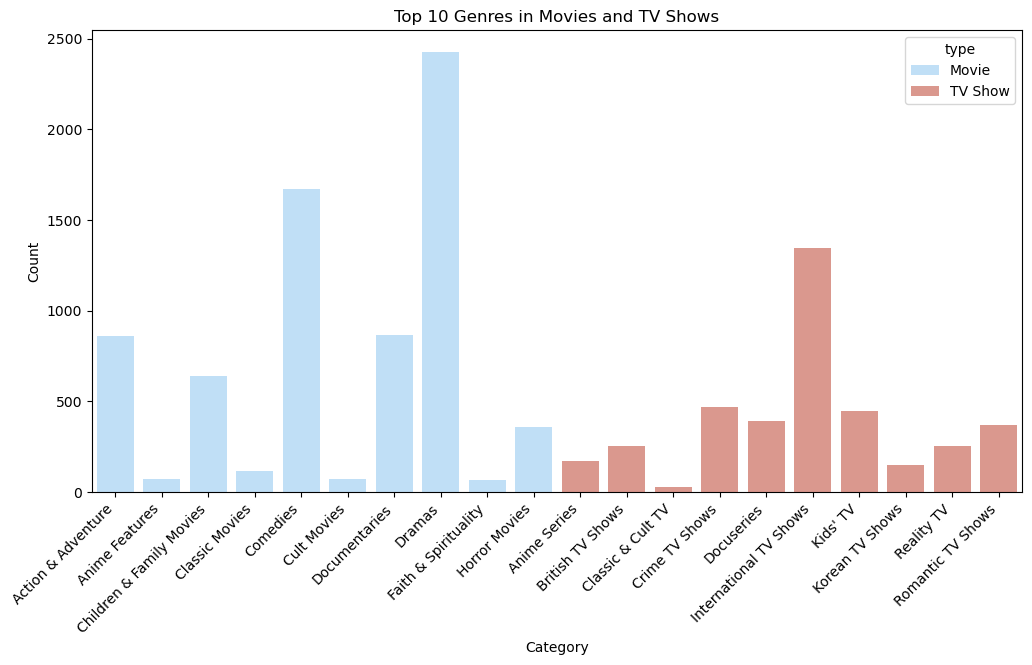

In [21]:
# If the 'category' column hasn't been renamed yet, rename 'listed_in' to 'category'
if 'listed_in' in df.columns:
    df.rename(columns={'listed_in': 'category'}, inplace=True)

# Split the 'category' column
df_split = df.assign(category=df['category'].str.split(', ')).explode('category')

# Count by category and type
category_count = df_split.groupby(['type', 'category']).size().reset_index(name='count')
category_df = category_count.groupby('type').head(10)

# Plot top genres for movies and TV shows
plt.figure(figsize=(12,6))
sns.barplot(data=category_df, x='category', y='count', hue='type', palette=['#B7E0FF', '#E78F81'])
plt.title('Top 10 Genres in Movies and TV Shows')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Insight: Popular genres include International Movies and Dramas for movies, and TV Dramas and International TV Shows for TV content.